X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shaoe (12,)
X_test.shape (6,) y_train.shape (6,)


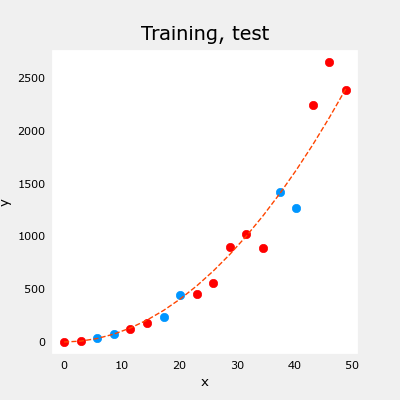

training err 58.01, test err 171215.01


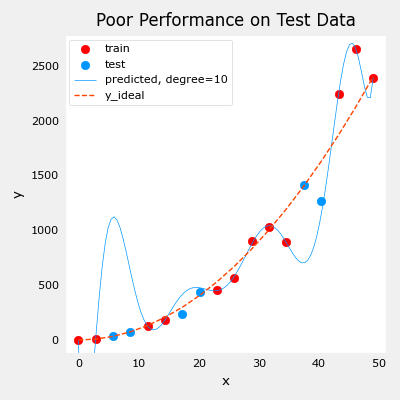

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


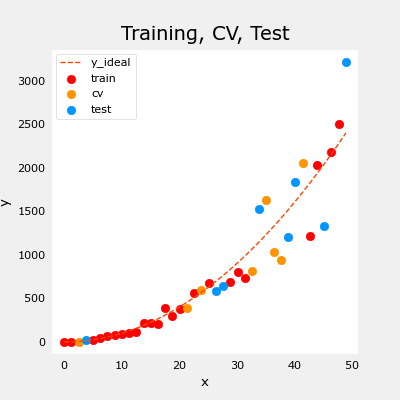

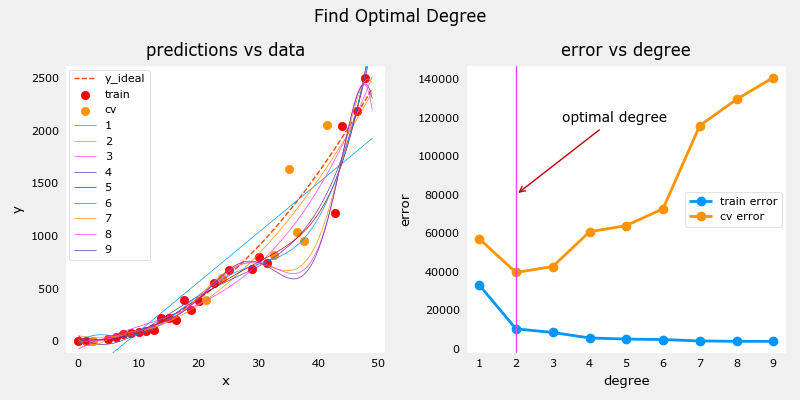

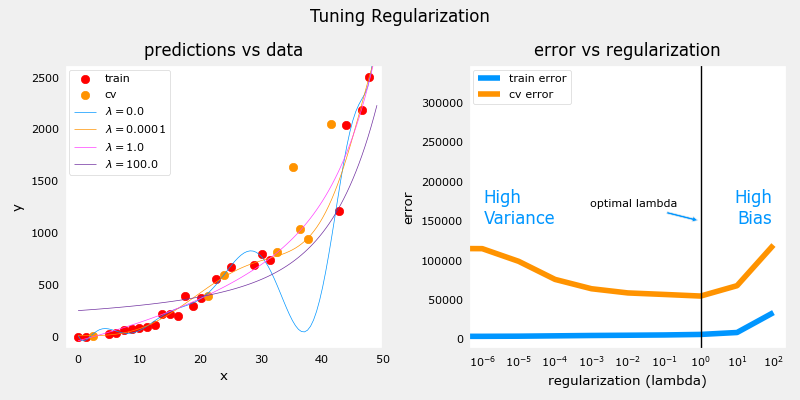

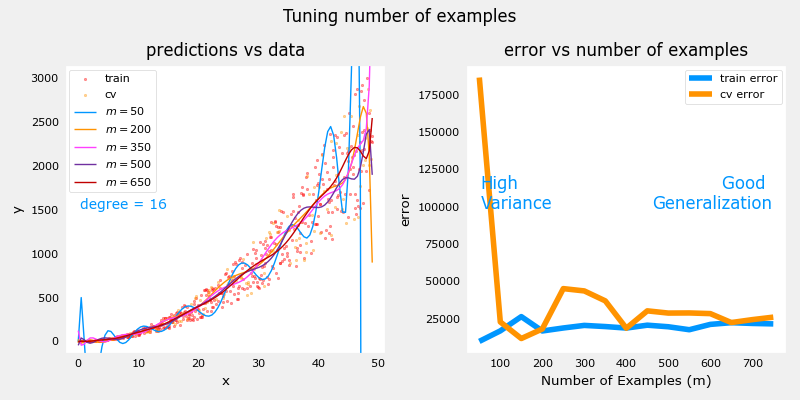

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


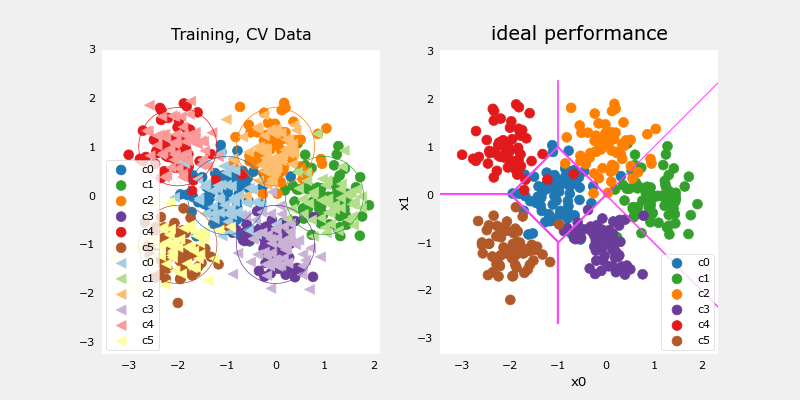

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


In [22]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import logging
logging.getLogger('tensorFlow').setLevel(logging.ERROR)


from assigment_utils import *

# generate some data
X, y, x_ideal, y_ideal = gen_data(18,2,0.7)
print('X.shape', X.shape, 'y.shape', y.shape)

# slipt the data using sklearn routine
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)
print('X_train.shape', X_train.shape, 'y_train.shaoe', y_train.shape)
print('X_test.shape', X_test.shape, 'y_train.shape', y_test.shape)

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(x_ideal, y_ideal, '--', color = 'orangered', label = 'y_ideal', lw=1)
ax.set_title('Training, test', fontsize = 14)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(X_train, y_train, color='red', label = 'train')
ax.scatter(X_test,y_test, color= dlc['dlblue'], label = 'test')
plt.show()

def eval_mse(y, yhat):
    """
    Calculate the mean squarred error on a data set
    Args: 
        y: (ndarray shape(m,) or (m,1)) target value of each example
        yhat: (ndarray shape(m,) or (m,1)) predicted value of each example
    returns:
        err: (scalar)
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err+= (y[i]-yhat[i])**2
    err =err/2*m
    return err

y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3,4.1])
eval_mse(y_hat, y_tmp)

# Create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

print(f'training err {err_train:0.2f}, test err {err_test:0.2f}')

# plot predictions over data range
x = np.linspace(0,int(X.max()), 100) # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x,y_pred, x_ideal, y_ideal, degree)

X,y, x_ideal, y_ideal = gen_data(40,5,0.7)
print('X.shape', X.shape, 'y.shape', y.shape)

X_train, X_, y_train, y_ = train_test_split(X,y, test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)
print('X_train.shape', X_train.shape, 'y_train.shape', y_train.shape)
print('X_cv.shape', X_cv.shape, 'y_cv.shape', y_cv.shape)
print('X_test.shape', X_test.shape, 'y_test.shape', y_test.shape)

fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

max_degree = 9
err_train = np.zeros(max_degree)
err_cv = np.zeros(max_degree)
x = np.linspace(0,int(X.max()),100)
y_pred = np.zeros((100,max_degree)) # columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:, degree] = lmodel.predict(x)

optimal_degree = np.argmin(err_cv) +1

plt.close('all')
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, err_train, err_cv, optimal_degree, max_degree)

# lets use regularization to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda
lambda_range = np.array([0.0,1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)
err_cv = np.zeros(num_steps)
x = np.linspace(0, int(X.max()),100)
y_pred = np.zeros((100,num_steps)) # columns are lines to plot

for i in range(num_steps):
    lambda_ = lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_ = lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)

optimal_reg_idx = np.argmin(err_cv)

plt.close('all')
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

# when the model is overfitting(high variance), collecting data can improve performance
# when the model is underfitting(high bias) it doesnt help to add more data
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

# generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.5, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.20, random_state=1)
print('X_train.shape:', X_train.shape, 'X_cv.shape:', X_cv.shape, 'X_test.shape:', X_test.shape)

plt_train_eq_dist(X_train, y_train, classes, X_cv, y_cv, centers, std)

def eval_cat_err(y, yhat):
    """
    Calculate the categorization error
    Args: 
        y: (ndarray shape (m,) or (m,1)) target value of each examples
        yhat: (ndarray shape (m,) or (m,1)) predicted value of each examples
    Returns:
        cerr: (scalar)
    """

    m = len(y)
    incorrect = 0
    for i in range(m):
        if(yhat[i] != y[i]):
            incorrect += 1
    cerr = incorrect / m
    return(cerr)
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

In [23]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import logging
logging.getLogger('tensorFlow').setLevel(logging.ERROR)


from assigment_utils import *

In [24]:
# generate some data
X, y, x_ideal, y_ideal = gen_data(18,2,0.7)
print('X.shape', X.shape, 'y.shape', y.shape)

# slipt the data using sklearn routine
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)
print('X_train.shape', X_train.shape, 'y_train.shaoe', y_train.shape)
print('X_test.shape', X_test.shape, 'y_train.shape', y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shaoe (12,)
X_test.shape (6,) y_train.shape (6,)


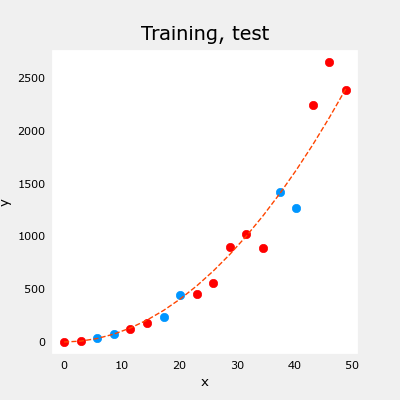

In [25]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(x_ideal, y_ideal, '--', color = 'orangered', label = 'y_ideal', lw=1)
ax.set_title('Training, test', fontsize = 14)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(X_train, y_train, color='red', label = 'train')
ax.scatter(X_test,y_test, color= dlc['dlblue'], label = 'test')
plt.show()

In [26]:
def eval_mse(y, yhat):
    """
    Calculate the mean squarred error on a data set
    Args: 
        y: (ndarray shape(m,) or (m,1)) target value of each example
        yhat: (ndarray shape(m,) or (m,1)) predicted value of each example
    returns:
        err: (scalar)
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err+= (y[i]-yhat[i])**2
    err =err/2*m
    return err

y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3,4.1])
eval_mse(y_hat, y_tmp)

np.float64(0.020000000000000122)

In [27]:
# Create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

print(f'training err {err_train:0.2f}, test err {err_test:0.2f}')

training err 58.01, test err 171215.01


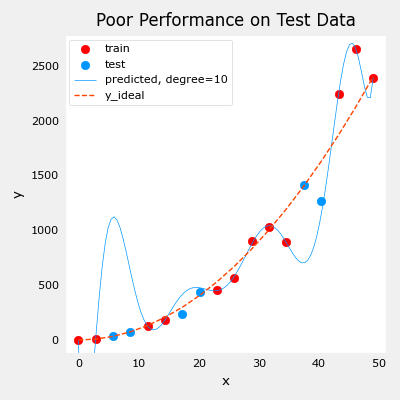

In [28]:
# plot predictions over data range
x = np.linspace(0,int(X.max()), 100) # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x,y_pred, x_ideal, y_ideal, degree)

In [29]:
X,y, x_ideal, y_ideal = gen_data(40,5,0.7)
print('X.shape', X.shape, 'y.shape', y.shape)

X_train, X_, y_train, y_ = train_test_split(X,y, test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)
print('X_train.shape', X_train.shape, 'y_train.shape', y_train.shape)
print('X_cv.shape', X_cv.shape, 'y_cv.shape', y_cv.shape)
print('X_test.shape', X_test.shape, 'y_test.shape', y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


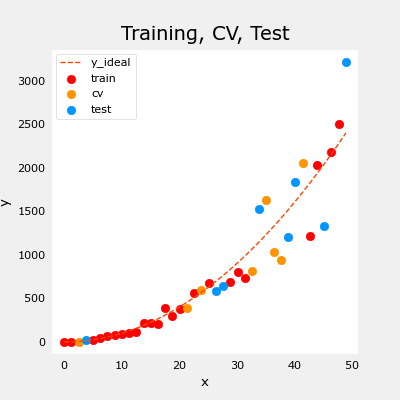

In [30]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

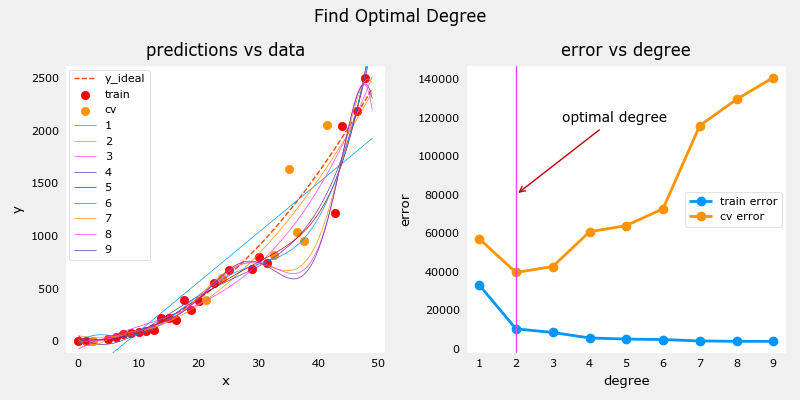

In [31]:
max_degree = 9
err_train = np.zeros(max_degree)
err_cv = np.zeros(max_degree)
x = np.linspace(0,int(X.max()),100)
y_pred = np.zeros((100,max_degree)) # columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:, degree] = lmodel.predict(x)

optimal_degree = np.argmin(err_cv) +1

plt.close('all')
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, err_train, err_cv, optimal_degree, max_degree)

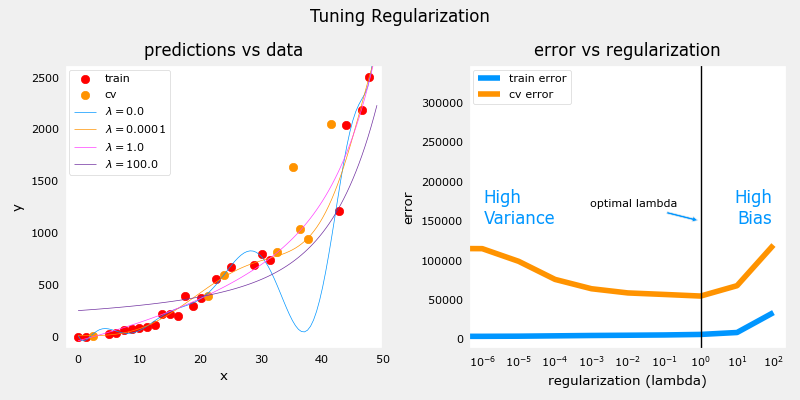

In [32]:
# lets use regularization to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda
lambda_range = np.array([0.0,1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)
err_cv = np.zeros(num_steps)
x = np.linspace(0, int(X.max()),100)
y_pred = np.zeros((100,num_steps)) # columns are lines to plot

for i in range(num_steps):
    lambda_ = lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_ = lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)

optimal_reg_idx = np.argmin(err_cv)

plt.close('all')
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

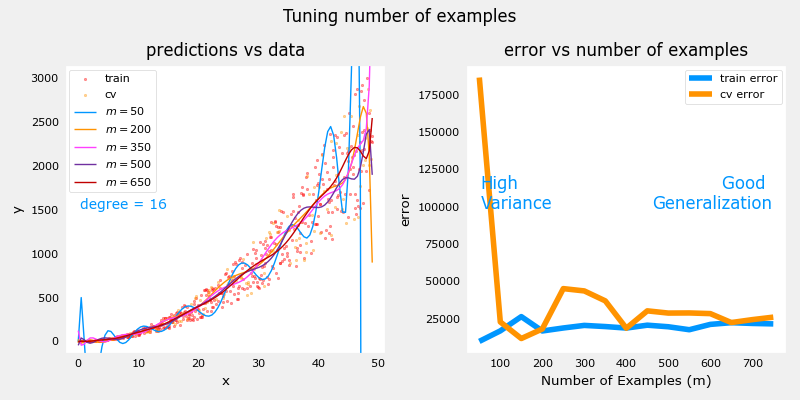

In [33]:
# when the model is overfitting(high variance), collecting data can improve performance
# when the model is underfitting(high bias) it doesnt help to add more data
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


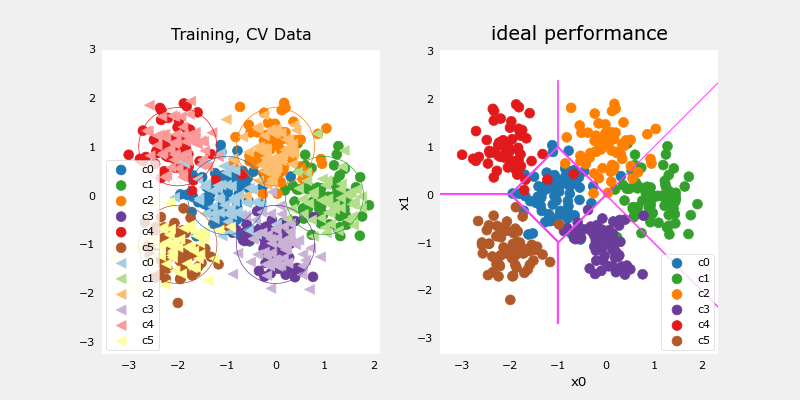

In [34]:
# generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.5, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.20, random_state=1)
print('X_train.shape:', X_train.shape, 'X_cv.shape:', X_cv.shape, 'X_test.shape:', X_test.shape)

plt_train_eq_dist(X_train, y_train, classes, X_cv, y_cv, centers, std)

In [35]:
def eval_cat_err(y, yhat):
    """
    Calculate the categorization error
    Args: 
        y: (ndarray shape (m,) or (m,1)) target value of each examples
        yhat: (ndarray shape (m,) or (m,1)) predicted value of each examples
    Returns:
        cerr: (scalar)
    """

    m = len(y)
    incorrect = 0
    for i in range(m):
        if(yhat[i] != y[i]):
            incorrect += 1
    cerr = incorrect / m
    return(cerr)

In [36]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
